In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from cuml import KMeans

from utils import *
from utils_rf import rf_prediction

# Choosing Test Patient

# Retrieving Patient Data

In [15]:
#142,51
test_patient = 51 #patient nr which i will test (1- 369 for training, 1- 125 for validation)

training_set = True #from which set is our patient, if from valid set is false
SLICE = 80

if training_set: #path to the folders,  define which path does the patient belong
    brats_path = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
    dataset_part = "_Training_"
else:
    brats_path = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
    dataset_part="_Validation_"

patient_data = retrieve_brats_data([test_patient], ['t1', 't2', 't1ce', 'flair'], dataset_part=dataset_part, brats_path=brats_path)

# Segmentation

## Otsu/Isodata Thresholding

In [16]:
segm_mask_otsu, segm_mask_isodata = threshold_patient(patient_data)

print("Dice score:")
print("\tOtsu", dice_score(segm_mask_otsu, patient_data[0,0]))
print("\tISODATA", dice_score(segm_mask_isodata, patient_data[0,0]))


print("Hausdorf Distance:")
print("\tOtsu", hausdorff_distance(segm_mask_otsu, patient_data[0,0]))
print("\tISODATA", hausdorff_distance(segm_mask_isodata, patient_data[0,0]))

Dice score:
	Otsu 0.8139628614559364
	ISODATA 0.8459900421294523
Hausdorf Distance:
	Otsu 77.94228634059948
	ISODATA 74.77967638335967


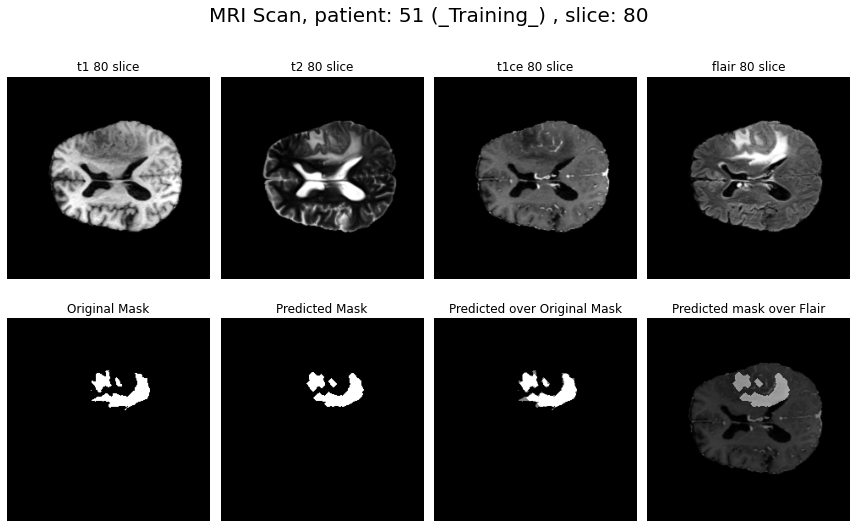

In [17]:
display_results(patient_data, segm_mask_otsu,SLICE, patient_no=test_patient, dataset_part=dataset_part) 

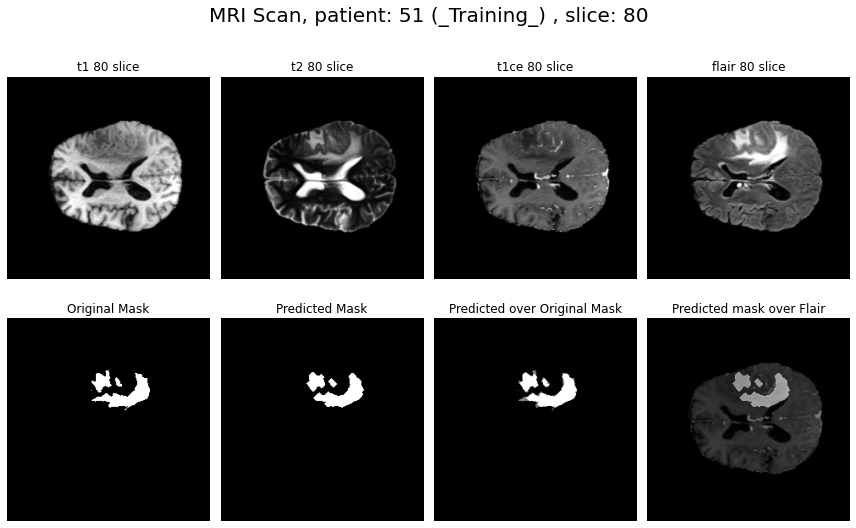

In [18]:
display_results(patient_data, segm_mask_isodata, SLICE, patient_no=test_patient, dataset_part=dataset_part) 

## K-Means

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans_mask = evaluate_patient_KMeans(kmeans, patient_data)
print("Dice score: ", dice_score(kmeans_mask, patient_data[0, 0]))
print("Hausdorf distance: ", hausdorff_distance(
    kmeans_mask, patient_data[0, 0]))

Dice score:  0.5935102779296467
Hausdorf distance:  82.44392033376384


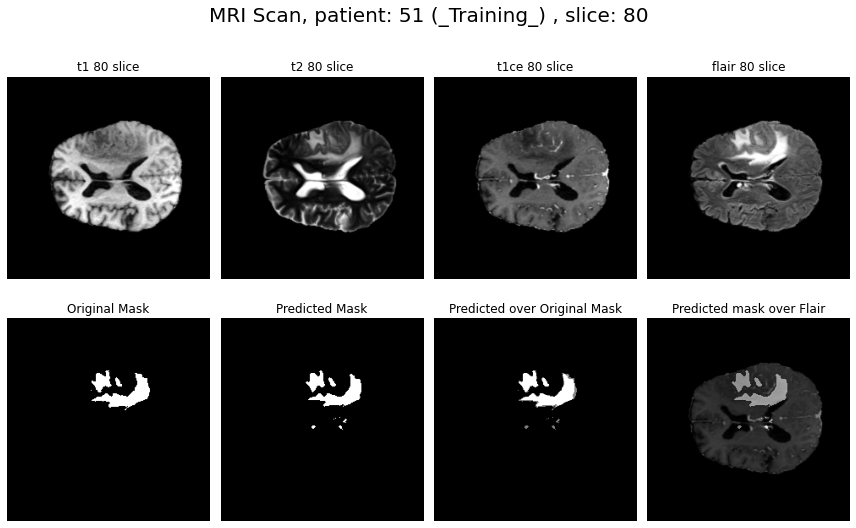

In [20]:
display_results(patient_data, kmeans_mask, SLICE, patient_no=test_patient, dataset_part=dataset_part) 

## SVM

In [21]:
svm_model = pickle.load(open("svm_gpu_4cls_std_train.pkl", 'rb'))

# predicted_mask = post_process(evaluate_brain(patient_data[0], feature_extractor_1, svm_model, False, 3))
if training_set:
    svm_mask = np.load(f'svm_training_masks/{test_patient}.npy') 
else:
    svm_mask = np.load(f'svm_validation_masks/{test_patient}.npy')

print("Dice score: ", dice_score(svm_mask, patient_data[0, 0]))
print("Hausdorf distance: ", hausdorff_distance(
    svm_mask, patient_data[0, 0]))

Dice score:  0.9085284464754009
Hausdorf distance:  47.686476070265456


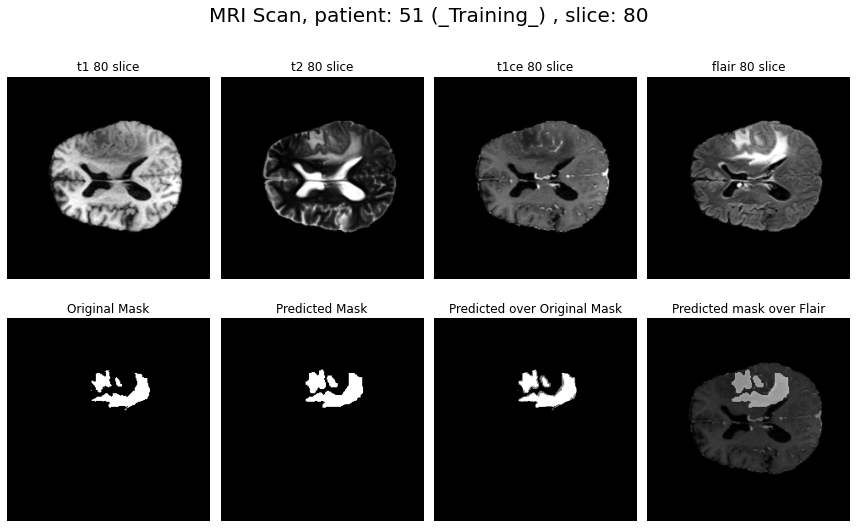

In [22]:
display_results(patient_data, svm_mask, SLICE, patient_no=test_patient, dataset_part=dataset_part) 

## Random Forest

In [23]:
rfc1_100 = pickle.load(open('finalized_model_100px.pkl', 'rb'))

In [24]:
# f1s_pred,hd_pred,result_mask,patient_data = rf_prediction([test_patient],rfc1_100, dataset_part,brats_path)
result_mask = np.load(f'rf_masks/{test_patient}.npy')

In [25]:
print("Dice score: ", dice_score(result_mask, patient_data[0, 0]))
print("Hausdorf distance: ", hausdorff_distance(
    result_mask, patient_data[0, 0]))

Dice score:  0.7288355989116868
Hausdorf distance:  21.213203435596427


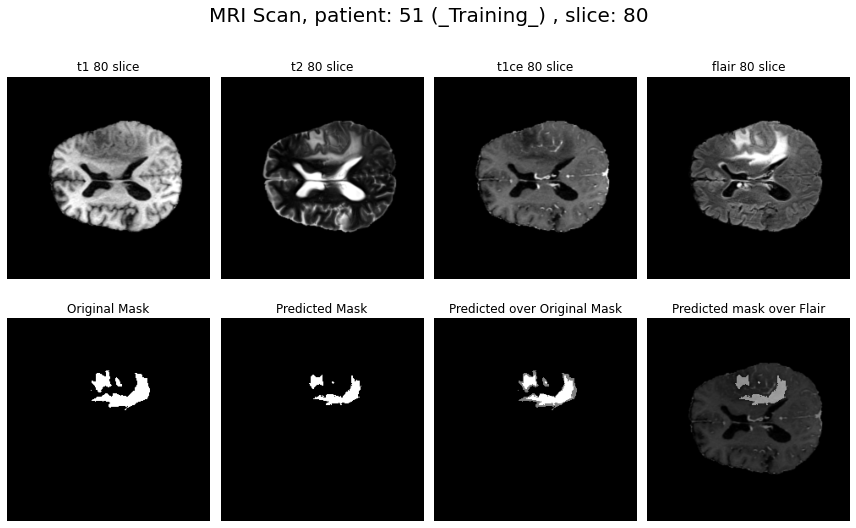

In [26]:
display_results(patient_data, result_mask, SLICE,test_patient,dataset_part)
# display_results(patient_data, result_mask, 100,test_patient,dataset_part)